In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('./data/train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.dtypes

In [16]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data['Gender'].value_counts()

Male      495
Female    112
Name: Gender, dtype: int64

In [6]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

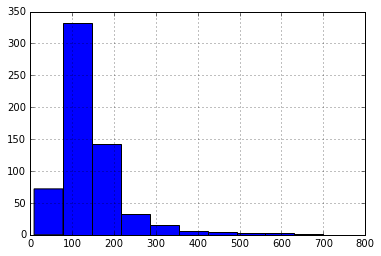

In [28]:
data['LoanAmount'].hist()

In [29]:
np.mean(data['LoanAmount'])

146.41146711635753

In [45]:
amount = stats.boxcox(data['LoanAmount'])[0]

In [50]:
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [55]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

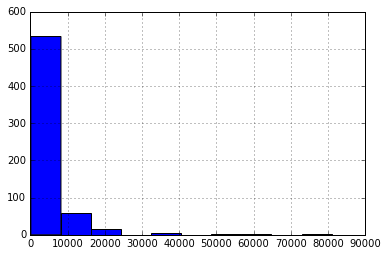

In [57]:
data['ApplicantIncome'].hist()

In [62]:
app_income = stats.boxcox(data['ApplicantIncome'])[0]

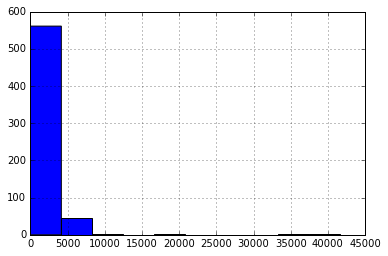

In [64]:
data['CoapplicantIncome'].hist()

In [59]:
data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('Yes')
data['Dependents'] = data['Dependents'].fillna('0')
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data['LoanAmount'] = data['LoanAmount'].fillna(np.mean(data['LoanAmount']))
data['LoanAmount'] = amount
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(360.0)
data['Credit_History'] = data['Credit_History'].fillna(1.0)
data['ApplicantIncome'] = app_income

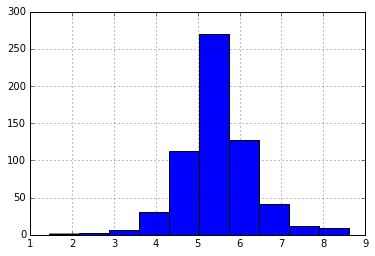

In [60]:
data['LoanAmount'].hist()

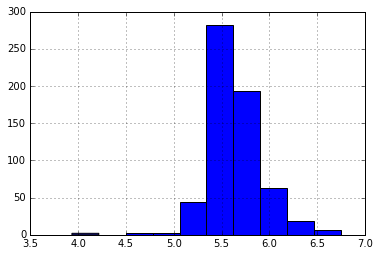

In [61]:
data['ApplicantIncome'].hist()

In [78]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [95]:
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['Married'] = labelencoder.fit_transform(data['Married'])
data['Dependents'] = labelencoder.fit_transform(data['Dependents'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Self_Employed'] = labelencoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = labelencoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = labelencoder.fit_transform(data['Loan_Status'])

In [97]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5.784390,0.0,5.664479,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,5.681300,1508.0,5.437236,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,5.496075,0.0,4.337609,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,5.428743,2358.0,5.326851,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,5.795017,0.0,5.604007,360.0,1.0,2,1


In [1]:
#label = pd.get_dummies(data['Loan_Status'])
#label = label.values

In [117]:
label

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [104]:
n_data = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [106]:
n_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5.784390,5.664479,360.0,1.0,2
1,1,1,1,0,0,5.681300,5.437236,360.0,1.0,0
2,1,1,0,0,1,5.496075,4.337609,360.0,1.0,2
3,1,1,0,1,0,5.428743,5.326851,360.0,1.0,2
4,1,0,0,0,0,5.795017,5.604007,360.0,1.0,2


In [112]:
data = StandardScaler().fit_transform(n_data.values)
data[0]

array([ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
        0.54412655,  0.22247449,  0.2732313 ,  0.41173269,  1.22329839])

In [124]:
import tensorflow as tf

In [144]:
# parameter

learning_rate = 0.0001
epochs = 100000
display_step = 500
n_samples = label.size

In [127]:
X = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([10,2]))

b = tf.Variable(tf.zeros([2]))

y_values = tf.add(tf.matmul(X, W), b)

y = tf.nn.softmax(y_values)

y_ = tf.placeholder(tf.float32, [None, 2])

In [140]:
cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2* n_samples)
#cost = tf.nn.softmax_cross_entropy_with_logits(y,y_)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [132]:
init = tf.initialize_all_variables()

In [145]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epochs):
        sess.run(optimizer, feed_dict={X: data, y_: label})
        
        if i % display_step == 0:
            cc = sess.run(cost, feed_dict={X: data, y_: label})
            print "Training step : " + str(i) + " cost = " + str(cc)
    pred = sess.run(y, feed_dict={X: data})

Training step : 0 cost = 0.124999
Training step : 500 cost = 0.124365
Training step : 1000 cost = 0.123738
Training step : 1500 cost = 0.12312
Training step : 2000 cost = 0.12251
Training step : 2500 cost = 0.121908
Training step : 3000 cost = 0.121314
Training step : 3500 cost = 0.120727
Training step : 4000 cost = 0.120148
Training step : 4500 cost = 0.119577
Training step : 5000 cost = 0.119013
Training step : 5500 cost = 0.118457
Training step : 6000 cost = 0.117908
Training step : 6500 cost = 0.117366
Training step : 7000 cost = 0.116832
Training step : 7500 cost = 0.116305
Training step : 8000 cost = 0.115785
Training step : 8500 cost = 0.115272
Training step : 9000 cost = 0.114767
Training step : 9500 cost = 0.114268
Training step : 10000 cost = 0.113776
Training step : 10500 cost = 0.11329
Training step : 11000 cost = 0.112812
Training step : 11500 cost = 0.11234
Training step : 12000 cost = 0.111874
Training step : 12500 cost = 0.111415
Training step : 13000 cost = 0.110962
Tr

In [147]:
pred

array([[ 0.32652295,  0.67347705],
       [ 0.289794  ,  0.71020597],
       [ 0.2603586 ,  0.73964143],
       ..., 
       [ 0.28921887,  0.71078116],
       [ 0.27846721,  0.72153276],
       [ 0.78181022,  0.21818972]], dtype=float32)

In [148]:
import numpy as np
def accuracy(pred, label):
    pred_class = np.argmax(pred, axis=1)
    true_class = np.argmax(label, axis=1)
    acc = accuracy =  (100.0 * np.sum(pred_class == true_class) / label.shape[0])
    return acc

In [149]:
print "accuracy : " + str(accuracy(pred, label))

accuracy : 80.9446254072
